In [2]:
import pandas as pd
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec

## Chose how many docs you want here; 

It didnt matter for me, there was always a blob and no clear clusters

In [83]:
docs = pd.read_json('post_process_data.json')['content']
docs = [doc.split() for doc in docs]
docs = docs[:100]

In [84]:
def tag(doc_list):
    for i, doc in enumerate(doc_list):
        yield TaggedDocument(doc, [i])
tagged_docs = list(tag(docs))

In [52]:
type(tagged_docs)

list

In [86]:
model = Doc2Vec(vector_size=50, min_count=5, epochs=40)
model.build_vocab(tagged_docs)

In [88]:
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [89]:
X = model.dv[range(len(model.dv))]

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

result = pca.fit_transform(X)

pca_df = pd.DataFrame(result, columns = ['x','y'])
#pca_df['doc'] = list(model.dv.key_to_index.keys())

In [91]:
pca_df.head()

,x,y
0,0.016016,0.007472
1,0.005742,-0.010489
2,-0.007172,-0.009885
3,-0.020163,0.001631
4,-0.006813,0.018229


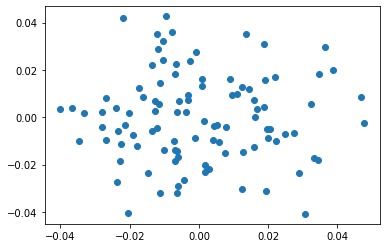

In [92]:
plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

# Multiple Datasets

In [43]:
docs = [doc.split() for doc in pd.read_json('post_process_data.json')['content']][:1000]
docs.extend([doc.split() for doc in pd.read_json('ukraine_processed.json')['content']][:1000])
docs.extend([doc.split() for doc in pd.read_json('monkeypox_processed.json')['content']][:1000])

In [44]:
len(docs)

3000

In [45]:
def tag(doc_list):
    for i, doc in enumerate(doc_list):
        yield TaggedDocument(doc, [i])
tagged_docs = list(tag(docs))

In [46]:
model = Doc2Vec(vector_size=50, min_count=5, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [47]:
X = model.dv[range(len(model.dv))]
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

result = pca.fit_transform(X)

pca_df = pd.DataFrame(result, columns = ['x','y'])

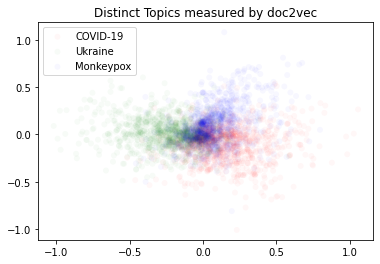

In [51]:
topics = {'COVID-19':{'x':pca_df['x'][:1000],'y':pca_df['y'][:1000],'colour':'red'},
         'Ukraine':{'x':pca_df['x'][1000:2000], 'y':pca_df['y'][1000:2000],'colour':'green'},
         'Monkeypox':{'x':pca_df['x'][2000:], 'y':pca_df['y'][2000:],'colour':'blue'}
         }

fig, ax = plt.subplots()
for topic in ['COVID-19', 'Ukraine', 'Monkeypox']:

    ax.scatter(topics[topic]['x'], topics[topic]['y'], c=topics[topic]['colour'], label=topic,
               alpha=0.03, edgecolors='none')

ax.legend()
plt.title('Distinct Topics measured by doc2vec')
plt.show()